In [135]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("NexaSat_data.csv")  # Update with your actual file path

df.head()

,Customer_ID,gender,Partner,Dependents,Senior_Citizen,Call_Duration,Data_Usage,Plan_Type,Plan_Level,Monthly_Bill_Amount,Tenure_Months,Multiple_Lines,Tech_Support,Churn
0,NSat2001,Female,Yes,No,0,156,8.36,Prepaid,Premium,126.00,44,Yes,Yes,0
1,NSat2002,Male,No,No,0,383,5.35,Prepaid,Basic,80.00,7,No,No,1
2,NSat2003,Male,No,No,0,407,3.04,Postpaid,Premium,314.80,15,Yes,Yes,1
3,NSat2004,Male,No,No,0,106,1.20,Prepaid,Premium,126.00,38,Yes,Yes,0
4,NSat2005,Female,No,No,0,124,5.63,Postpaid,Premium,97.95,17,Yes,Yes,1


In [137]:
column_names = df.columns.tolist()

# Print the column names
print(column_names)

['Customer_ID', 'gender', 'Partner', 'Dependents', 'Senior_Citizen', 'Call_Duration', 'Data_Usage', 'Plan_Type', 'Plan_Level', 'Monthly_Bill_Amount', 'Tenure_Months', 'Multiple_Lines', 'Tech_Support', 'Churn']


In [117]:
# Drop irrelevant columns
df = df.drop(columns=['Customer_ID'])  # Unique identifier, not needed for regression

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'Plan_Type', 'Plan_Level'], drop_first=True)
df.head()

,Senior_Citizen,Call_Duration,Data_Usage,Monthly_Bill_Amount,Tenure_Months,Multiple_Lines,Tech_Support,Churn,gender_Male,Partner_Yes,Dependents_Yes,Plan_Type_Prepaid,Plan_Level_Premium
0,0,156,8.36,126.00,44,Yes,Yes,0,False,True,False,True,True
1,0,383,5.35,80.00,7,No,No,1,True,False,False,True,False
2,0,407,3.04,314.80,15,Yes,Yes,1,True,False,False,False,True
3,0,106,1.20,126.00,38,Yes,Yes,0,True,False,False,True,True
4,0,124,5.63,97.95,17,Yes,Yes,1,False,False,False,False,True


In [119]:
# Define independent variables (predictors)
X = df[['Monthly_Bill_Amount', 'Tenure_Months', 'Call_Duration', 'Data_Usage', 'Senior_Citizen', 
        'Partner_Yes', 'Dependents_Yes', 'Plan_Type_Prepaid', 'Plan_Level_Premium']]

In [121]:
# Define dependent variable (target)
y = df['Churn']

In [123]:
# Add constant for intercept
X = sm.add_constant(X)

In [125]:
# Convert boolean columns to integers
X['Partner_Yes'] = X['Partner_Yes'].astype(int)
X['Dependents_Yes'] = X['Dependents_Yes'].astype(int)
X['Plan_Type_Prepaid'] = X['Plan_Type_Prepaid'].astype(int)
X['Plan_Level_Premium'] = X['Plan_Level_Premium'].astype(int)


In [127]:
print(X.dtypes)  # Check data types of features
print(y.dtypes)

const                  float64
Monthly_Bill_Amount    float64
Tenure_Months            int64
Call_Duration            int64
Data_Usage             float64
Senior_Citizen           int64
Partner_Yes              int32
Dependents_Yes           int32
Plan_Type_Prepaid        int32
Plan_Level_Premium       int32
dtype: object
int64


In [129]:
# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.520712
         Iterations 6


In [131]:
# Convert coefficients to absolute values for relative importance calculation
abs_coefficients = result.params.abs()

# Normalize to sum to 100% (relative importance)
percentage_weights = (abs_coefficients / abs_coefficients.sum()) * 100

# Print percentage weights
print("\nPercentage Weights for Feature Importance:")
print(percentage_weights)


Percentage Weights for Feature Importance:
const                   8.409274
Monthly_Bill_Amount     0.020333
Tenure_Months           0.058193
Call_Duration           0.007675
Data_Usage              1.843173
Senior_Citizen          1.422539
Partner_Yes             1.011496
Dependents_Yes          2.375807
Plan_Type_Prepaid      26.952671
Plan_Level_Premium     57.898838
dtype: float64


In [133]:
column_names = df.columns.tolist()

# Print the column names
print(column_names)

['Senior_Citizen', 'Call_Duration', 'Data_Usage', 'Monthly_Bill_Amount', 'Tenure_Months', 'Multiple_Lines', 'Tech_Support', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Plan_Type_Prepaid', 'Plan_Level_Premium']


C:\Users\pc1\AppData\Local\Temp\ipykernel_12940\735665071.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Random_Forest_Importance', y='Feature', data=importance_df, palette="Blues_r")


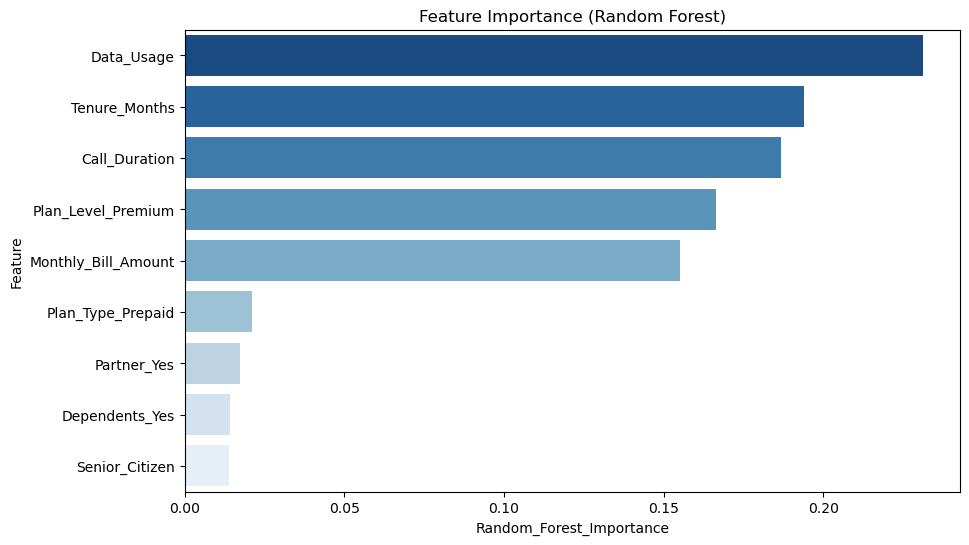


Feature Importance from Random Forest:
               Feature  Decision_Tree_Importance  Random_Forest_Importance
3           Data_Usage                  0.105473                  0.231167
1        Tenure_Months                  0.215682                  0.193995
2        Call_Duration                  0.007187                  0.186800
8   Plan_Level_Premium                  0.628301                  0.166406
0  Monthly_Bill_Amount                  0.002877                  0.155085
7    Plan_Type_Prepaid                  0.033683                  0.021089
5          Partner_Yes                  0.000000                  0.017276
6       Dependents_Yes                  0.000000                  0.014189
4       Senior_Citizen                  0.006798                  0.013993


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("NexaSat_data.csv")  # Update with your actual file path

# Drop unique identifier
df = df.drop(columns=['Customer_ID'])

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'Plan_Type', 'Plan_Level'], drop_first=True)

# Define independent variables (features)
X = df[['Monthly_Bill_Amount', 'Tenure_Months', 'Call_Duration', 'Data_Usage', 'Senior_Citizen',
        'Partner_Yes', 'Dependents_Yes', 'Plan_Type_Prepaid', 'Plan_Level_Premium']]

# Define dependent variable (target)
y = df['Churn']

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_

# Convert to DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Decision_Tree_Importance': dt_importance,
    'Random_Forest_Importance': rf_importance
}).sort_values(by='Random_Forest_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Random_Forest_Importance', y='Feature', data=importance_df, palette="Blues_r")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Print feature importance
print("\nFeature Importance from Random Forest:")
print(importance_df)


In [11]:
# Convert feature importance to percentage
importance_values = importance_df['Random_Forest_Importance']
importance_percent = (importance_values / importance_values.sum()) * 100

# Add percentage to the DataFrame
importance_df['Percentage_Weight'] = importance_percent

# Display the results sorted by percentage weight
importance_df = importance_df.sort_values(by='Percentage_Weight', ascending=False)

print(importance_df[['Feature', 'Percentage_Weight']])


               Feature  Percentage_Weight
3           Data_Usage          23.116743
1        Tenure_Months          19.399522
2        Call_Duration          18.680002
8   Plan_Level_Premium          16.640580
0  Monthly_Bill_Amount          15.508503
7    Plan_Type_Prepaid           2.108948
5          Partner_Yes           1.727574
6       Dependents_Yes           1.418878
4       Senior_Citizen           1.399250
